
# Cohort 

A cohort is a group of people who have something in commom. 

so we can say: Let's see which month or week our customers came unto our network.

Basically customer aquisition based on weeks or months. This becomes a cohort as what customers have in common is their 
acqusition date. 

This is  descriptive analysis.

So there are three types of cohort generally.

1. Time cohort: this describes customers who signed up to a service at a particular time

2. Behavior cohort: this talks about customers who made purchase of a certain product or service in the past

3. Size cohort: this refers to various size of sizes of customers who make purchase of a company's product.


For this project we will work on Time cohort. We will divide our customers on aqusition cohorts this depends on the month they made their first purchase.

We will then assign a cohort index to every purchase history this will show us the number of months since last purchase.



#### Objectives:

Finding the percentage of active customers compared to the total number of customers after each month:

Customer Segmentations

Interpret the retention rate


In [1]:
#this is for our data analysis
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#for our plots
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [18]:
#lets load our data.
#our focus is on the sheet called 'transaction' 
#we will look at that dataset and do our cleaning.

url='C:/Users/287910031/Desktop/KPMG_VI_New_raw_data_update_final.xlsx'

trans_df=pd.read_excel(url,sheet_name='Transactions',header=1)

In [19]:
#so lets explore the data 

trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [20]:
#lets see if there are missing values in here 
trans_df.info()

#from our checks we see that there are some missing values.
#we then have to decide what to do to these missing values.
#first lets see the percentage of missing values
#then we will decide if we will delete,fill the them with mode,or mean


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [22]:
number_of_missing=trans_df.isna().sum().sort_values(ascending=False)
percentage_miss=(trans_df.isna().mean()*100).sort_values(ascending=False)

missing_df=pd.concat([number_of_missing,percentage_miss],keys=['Count','Percentage'],axis=1)

missing_df

,Count,Percentage
online_order,360,1.800
product_first_sold_date,197,0.985
standard_cost,197,0.985
product_size,197,0.985
product_class,197,0.985
product_line,197,0.985
brand,197,0.985
list_price,0,0.000
order_status,0,0.000
transaction_date,0,0.000


In [30]:
missing_df['Count'].sum()

1542

# Cleaning the data

we are going to assume there are empty " " cells in our dataframe.Hence we will go ahead and replace all ' ' with np.Nan

then since most of our empty cells are less than 1% we decided we will replace them with their respective mean.



In [36]:
trans_df=trans_df.replace(" ",np.NaN)

In [38]:
trans_df=trans_df.fillna(trans_df.mean())

In [40]:
#now lets count the numbere of missing values
trans_df.isnull().values.sum()
#we still have some missing values
#i am suspecting the columns which are of data type object
#this is because these "values" do not have a mean 


788

In [42]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [45]:
trans_df.isna().sum().sort_values(ascending=False)

product_size               197
product_class              197
product_line               197
brand                      197
product_first_sold_date      0
standard_cost                0
list_price                   0
order_status                 0
online_order                 0
transaction_date             0
customer_id                  0
product_id                   0
transaction_id               0
dtype: int64

In [47]:
#lets explore these columns and see

trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [77]:
for col in trans_df.columns:
    if trans_df[col].dtypes=='object':
        trans_df[col]=trans_df[col].fillna(trans_df[col].mode()[0])
        
   # print (col)

In [79]:
trans_df.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [76]:
trans_df.select_dtypes(include='object').mode().loc[0]

order_status     Approved
brand               Solex
product_line     Standard
product_class      medium
product_size       medium
Name: 0, dtype: object

Now we have sucessfully cleaned our dataframe.We now have a clean data.

Next is the cohort analysis.

So we want to have the transaction month, to do that we will take the transaction_date, then we will decide to change the days a

and use 1st day of the month. We can decide to look at just the month and year.


In [103]:
def get_month(x):
    return dt.datetime(x.year,x.month,1)

In [109]:
trans_df['Transaction_Month']=trans_df['transaction_date'].dt.to_period('M')

In [112]:
trans_df['Trans_Month_1Day']=trans_df['transaction_date'].apply(get_month)

In [113]:
trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Transaction_Month,Trans_Month_1Day
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02,2017-02-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05,2017-05-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10,2017-10-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08,2017-08-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10,2017-10-01


Let me explain what is happening here:

So we want to get the cohort months, that's the min day aquisition was made.Eg: If customer A made purchase on 25th May 2014,

We want to say this customer came in May 2014. But this customer has also made other transaction, but we want the 1st time 

customer purchased, and want to work with that with the other purchases also in mind.

So we want to see for customer whats the trend, is he buying after every 20 days, and so on.

So we use the transform here so we keep the index and make other analysis based on that from other transactions.

In [124]:
trans_df['Cohort_Month']=trans_df.groupby('customer_id')['Trans_Month_1Day'].transform('min')

In [127]:
trans_df[trans_df['customer_id']==3120]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Transaction_Month,Trans_Month_1Day,Cohort_Month
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05,2017-05-01,2017-01-01
6861,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,2017-10,2017-10-01,2017-01-01
9154,9155,91,3120,2017-10-30,1.0,Approved,Solex,Standard,medium,medium,100.35,75.26,38002.0,2017-10,2017-10-01,2017-01-01
11408,11409,95,3120,2017-01-30,0.0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,34556.0,2017-01,2017-01-01,2017-01-01
13065,13066,38,3120,2017-01-20,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,34071.0,2017-01,2017-01-01,2017-01-01
15828,15829,41,3120,2017-12-10,0.0,Approved,Solex,Road,medium,medium,416.98,312.74,41848.0,2017-12,2017-12-01,2017-01-01
18611,18612,10,3120,2017-10-24,0.0,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,38216.0,2017-10,2017-10-01,2017-01-01


In [133]:
def get_date_int(df,column):
    year=df[column].dt.year
    month=df[column].dt.month
    day=df[column].dt.day
    return year,month,day


trans_year,trans_month,trans_day=get_date_int(trans_df,'Trans_Month_1Day')

In [137]:
#Now lets do same for cohort

cohort_year,cohort_month,cohort_day=get_date_int(trans_df,'Cohort_Month')

In [138]:
#Now lets get the difference in years
#Months 
#And Days

year_diff=trans_year-cohort_year
month_diff=trans_month-cohort_month


In [151]:
month_diff

0         0
1         4
2         9
3         6
4         9
5         1
6         2
7         3
8         6
9         7
10        0
11        0
12        1
13        8
14        5
15        6
16        1
17        5
18        2
19        0
20        4
21        1
22        3
23        9
24        5
25        0
26        2
27        9
28        9
29        0
         ..
19970     0
19971     3
19972     0
19973    10
19974     6
19975     5
19976     0
19977     9
19978    11
19979     1
19980     5
19981     2
19982     0
19983     6
19984     8
19985    10
19986     9
19987     3
19988     3
19989     0
19990     0
19991     8
19992     1
19993     9
19994     4
19995     5
19996    10
19997     0
19998     5
19999     6
Length: 20000, dtype: int64

In [ ]:
#So we want to get the months or the cohort Index.
#Since there is no 0 month, we need to add+1 to the months
#Which means month 0 will now become month 1
#And month 11 is 12 
##so the years are 0
##so we multiply the year by 12, then we add it to the month 
#Now since its 0 we get our months to be still the same
#Then we add 1 to the months
#Lets go ahead and just do it for the month only

In [166]:
trans_df.loc[0,]

transaction_id                               1
product_id                                   2
customer_id                               2950
transaction_date           2017-02-25 00:00:00
online_order                                 0
order_status                          Approved
brand                                    Solex
product_line                          Standard
product_class                           medium
product_size                            medium
list_price                               71.49
standard_cost                            53.62
product_first_sold_date                  41245
Transaction_Month                      2017-02
Trans_Month_1Day           2017-02-01 00:00:00
Cohort_Month               2017-02-01 00:00:00
Name: 0, dtype: object

In [167]:
trans_df['Cohort_Index']=month_diff + 1

In [168]:
trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Transaction_Month,Trans_Month_1Day,Cohort_Month,Cohort_Index
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10,2017-10-01,2017-01-01,10


In [196]:
cohort_data=trans_df.groupby(['Cohort_Month', 'Cohort_Index'])['customer_id'].nunique()

In [198]:
cohort_data=cohort_data.reset_index()

In [199]:
cohort_data.head()

,Cohort_Month,Cohort_Index,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [202]:
cohort_counts=cohort_data.pivot(index='Cohort_Month',columns='Cohort_Index',values='customer_id')

In [203]:
cohort_counts.head()

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2017-01-01,1354.0,486.0,508.0,509.0,502.0,483.0,518.0,529.0,500.0,531.0,497.0,516.0
2017-02-01,800.0,325.0,298.0,313.0,288.0,298.0,308.0,281.0,329.0,308.0,296.0,NaN
2017-03-01,484.0,167.0,174.0,167.0,182.0,184.0,172.0,212.0,189.0,181.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN


In [180]:
# Counting daily active user from each chort
#grouping = transaction_df.groupby(['CohortMonth', 'CohortIndex'])
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
#cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
#cohort_data = cohort_data.reset_index()
 # Assigning column names to the dataframe created above
#cohort_counts = cohort_data.pivot(index='CohortMonth',
#                                 columns ='CohortIndex',
#                                 values = 'customer_id')
# Printing top 5 rows of Dataframe

In [209]:
cohort_size=cohort_counts.iloc[:,0]

In [217]:
cohort_size

Cohort_Month
2017-01-01    1354.0
2017-02-01     800.0
2017-03-01     484.0
2017-04-01     336.0
2017-05-01     210.0
2017-06-01     122.0
2017-07-01      77.0
2017-08-01      51.0
2017-09-01      23.0
2017-10-01      20.0
2017-11-01      13.0
2017-12-01       4.0
Name: 1, dtype: float64

In [225]:
retention=cohort_counts.divide(cohort_size,axis=0)*100

retention=retention.round(3)

In [231]:
#Now lets visualize 
#we could have used the Trans_Month
#But hey it always good to explore and use new methods
#so lets first change the index
#take the day out
#then we will go ahead visualize

retention.index=retention.index.strftime('%Y-%m')



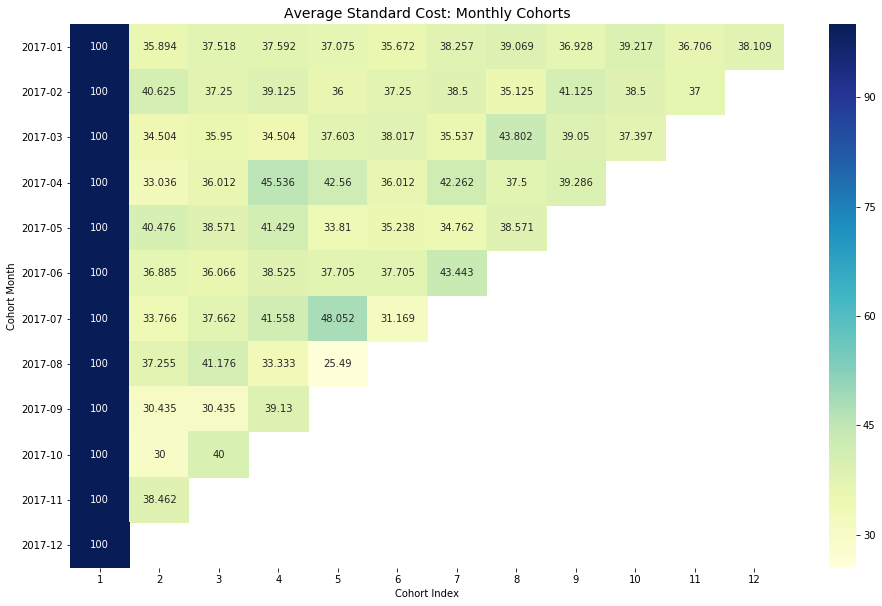

In [245]:
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [ ]:
url:''